In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [10]:
class PCA_DD:
    def __init__(self, k):
        self.k = k
        self.W = None
    def fit(self, X):
        X -= X.mean(axis=0)
        S = 1/(len(X)-1) * X.T @ X
        eigvalues, eigvectors = np.linalg.eig(S)
        self.W = eigvectors[:, range(-1, -self.k - 1, -1)]
    def predict(self, X):
        return X @ self.W

In [11]:
pca = PCA_DD(2)
pca.fit(X)
X_ = pca.predict(X)

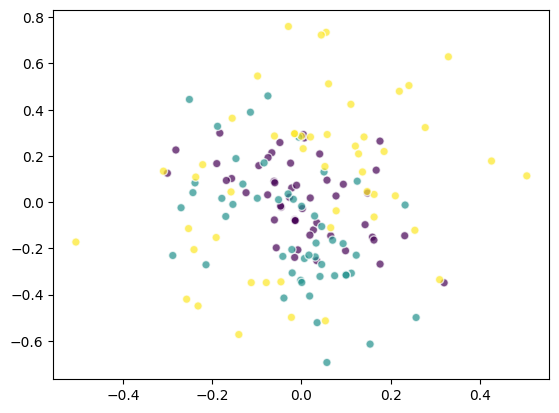

In [12]:
fig, ax = plt.subplots()
ax.scatter(X_[:,0],X_[:,1],c=y,                # 用y的值映射颜色
    cmap='viridis',     # 颜色映射方案
    alpha=0.7,          # 透明度
    edgecolors='w')

In [13]:
class PCA_OD:
    def __init__(self, k):
        self.k = k
        self.W = None
    def fit(self, X):
        X -= X.mean(axis=0)
        S = 1/(len(X)-1) * X.T @ X
        eigvalues, eigvectors = np.linalg.eig(S)
        self.W = eigvectors[:, range(-1, -self.k - 1, -1)]
    def predict(self, X):
        R = (X @ self.W @ self.W.T - X)
        return np.linalg.norm(R,axis=1) ** 2

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)
# 添加离群点
import numpy as np
X_outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack([X, X_outliers])
y = np.hstack([y, np.full(20, -1)])  # 用-1标记离群点

In [17]:
pca = PCA_OD(1)
pca.fit(X)
y_pred = pca.predict(X)
print(np.round(y_pred), y)

[  0.   0.   0.   1.   5.   0.   0.   4.   1.   4.   0.   0.   0.   0.
   4.   1.   0.   5.   0.   0.   0.   0.   0.   0.   0.   0.   3.   1.
   0.   0.   5.   0.   4.   0.   0.   0.   1.   0.   0.   2.   1.   3.
   0.   3.   0.   0.   1.   0.   0.   1.   2.   0.   0.   0.   0.   1.
   0.   0.   0.   2.   3.   0.   0.   1.   2.   0.   0.   0.   3.   1.
   3.   0.   0.   0.   0.   1.   3.   0.   0.   1.   2.   3.   0.   0.
   0.   0.   1.   0.   0.   3.   0.   2.   0.   1.   1.   1.   7.   1.
   1.   1.   1.   0.   0.   2.   3.   0.   0.   1.   4.   0.   0.   0.
   1.   1.   1.   0.   0.   1.   1.   2.   0.   5.   0.   0.   0.   3.
   0.   0.   7.   0.   1.   0.   0.   1.   0.   0.   8.   0.   0.   3.
   4.   5.   3.   1.   6.   0.   1.   0.   0.   0.   0.   0.   0.   1.
   1.   1.   1.   0.   1.   0.   2.   2.   0.   0.   0.   0.   1.   3.
   0.   0.   0.   0.   2.   1.   0.   5.   2.   0.   0.   3.   1.  11.
   1.  11.   1.   1.   2.   0.   0.   0.   0.   1.   2.   0.   0.   1.
   0. 